This problem I found in [Kaggle's 'Iris Species' competition](https://www.kaggle.com/uciml/iris).

I also recommend you before view this solution to preview 'data_changing.ipynb'

## Import data and libraries

In [116]:
import pandas as pd
import numpy as np
from random import random
import matplotlib.pyplot as plt

In [117]:
data=pd.read_csv('updated_iris.csv')

### Note that in data:
####  0-Iris-setosa
#### 1-Iris-versicolor
#### 2-Iris-virginica

In [118]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [119]:
data=data.sample(150)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
63,6.1,2.9,4.7,1.4,1
117,7.7,3.8,6.7,2.2,2
50,7.0,3.2,4.7,1.4,1
89,5.5,2.5,4.0,1.3,1
143,6.8,3.2,5.9,2.3,2
...,...,...,...,...,...
134,6.1,2.6,5.6,1.4,2
108,6.7,2.5,5.8,1.8,2
122,7.7,2.8,6.7,2.0,2
69,5.6,2.5,3.9,1.1,1


In [120]:
iris_species={
    0:'Iris-setosa',
    1:'Iris-versicolor',
    2:'Iris-virginica'
}

## Set some variables

In [121]:
x=data.values[:105,0:-1]
y=data.values[:105,-1]
init_theta=np.random.random((1,(x.shape)[1]))

In [122]:
init_theta 


array([[0.6378029 , 0.18687579, 0.05948782, 0.28460953]])

## Set functions

In [123]:
def sigmoid(z):
    return 1 / ( 1 + np.exp(-z) )

In [124]:
def onevsall(theta,X,y):
    m,n=X.shape
    count=int(np.max(y))
    
    opt_theta=np.zeros((count+1,n))
    out_j=np.array([])
    
    initial_theta=theta
    
    for i in np.arange(count+1):
        out_theta,j_hist= gradient_descent( initial_theta , X , np.where( y==i,1,0 )   ,1000,0.1 )
        opt_theta[i,:]=out_theta
        out_j=np.hstack((j_hist,out_j))
        
    return opt_theta,out_j 

#### Try to minimize our cost function 

In [125]:
def cost_grad(theta,X,y):
    m,n=X.shape
    h = sigmoid((theta) @ X.T)
    h=h.flatten()
    
    J = (1 / m) * np.sum(  np.square( h-y) )
    grad = (1 / m) * ( X.T  @ (h - y) )
    return J,grad

In [126]:
def gradient_descent(theta,X,y,iteration,alpha):
    m,n=X.shape
    j_hist=[]
    for i in np.arange(iteration):
        J,grad=cost_grad(theta,X,y)
        theta=theta-(alpha*grad)
        j_hist.append(J)
    return theta,np.array(j_hist)    

## Figure out parameters

In [127]:
X=np.hstack((np.ones((x.shape[0],1)),x))
into_theta=np.hstack((np.ones((init_theta.shape[0],1)),init_theta))

In [128]:
opt_theta,j=onevsall(into_theta,X,y)
print('Here\'s optimal parameters:\n',opt_theta)

Here's optimal parameters:
 [[ 1.22538001  0.57480963  1.5781728  -2.98216084 -1.06479831]
 [ 1.32787736  0.63097684 -2.13601594  0.70313555 -1.68218967]
 [-0.41017897 -2.10170534 -1.91801386  2.84550456  3.14200361]]


In [129]:
def prediction(X,theta):
    m,n=X.shape
    y_out=[]
    
    for i in range(m):
        test=sigmoid(theta @ X[i,:].T)
        add=np.argmax(test)
        y_out.append(add)
    return np.array(y_out)    

In [130]:
val=prediction(X,opt_theta)


#### Let's find accuaracy and look at our error(cost history)

In [131]:
def accuaracy(val,y):
    s=list(val==y)
    count1=s.count(True)
    count2=(y.shape[0])
    
    acc=count1/count2
    return acc

In [132]:
acc=accuaracy(val,y)
print('accuaracy is: {0:.5f} % ' .format(acc*100))

accuaracy is: 95.23810 % 


In [133]:
x_test=data.values[105:,0:-1]
y_test=data.values[105:,-1]
X_test=np.hstack((np.ones((x_test.shape[0],1)),x_test))
val_test=prediction(X_test,opt_theta)
acc_test=accuaracy(val_test,y_test)

print('accuaracy in test data is: {0:.5f} % ' .format(acc_test*100))

accuaracy in test data is: 97.77778 % 


In [134]:
errors=j[::1000]
for i in range(len(errors)):
    print(  'for %i row parametr error is %.5f ' % ( i+1,errors[i] ))

for 1 row parametr error is 0.67866 
for 2 row parametr error is 0.66999 
for 3 row parametr error is 0.63535 


Text(0, 0.5, 'Errors for 1')

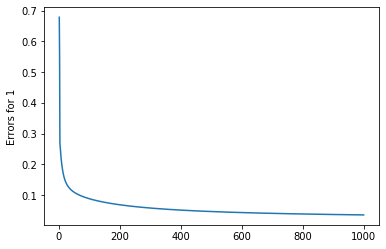

In [135]:
x_plt=np.linspace(1,1000,1000)
y_plt=(j[0:1000])
plt.plot( x_plt, y_plt  )
plt.ylabel('Errors for 1')

Text(0, 0.5, 'Errors for 2')

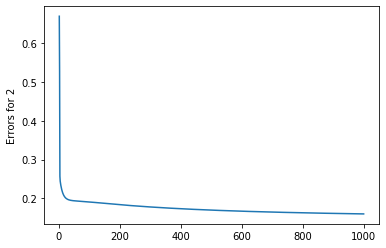

In [136]:
x_plt=np.linspace(1,1000,1000)
y_plt=(j[1000:2000])
plt.plot( x_plt, y_plt  )
plt.ylabel('Errors for 2')

Text(0, 0.5, 'Errors for 3')

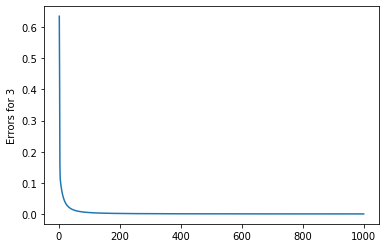

In [137]:
x_plt=np.linspace(1,1000,1000)
y_plt=(j[2000:])
plt.plot( x_plt, y_plt  )
plt.ylabel('Errors for 3')